# <h1 style="padding:10px; background-color:#0f4c5c; margin:0; color:white; font-family:newtimeroman; font-size:300%; text-align:center;border-radius: 25px 25px; overflow:hidden; font-weight:500">Análise da Varila do Macaco / <br>Monkeypox Analysis<br></h1>

<h3 style="padding:5px;text-align:center"> RESUMO </h3>
<br> O vírus da varíola é um orthopoxvirus que causa uma doença com sintomas semelhantes, mas menos graves, à varíola. Enquanto a varíola foi erradicada em 1980, a varíola dos macacos continua a ocorrer em países da África central e ocidental. Monkeypox é uma zoonose: uma doença que é transmitida de animais para humanos. Casos são frequentemente encontrados perto de florestas tropicais onde há animais que carregam o vírus. Pode ser transmitido através do contato com fluidos corporais, lesões na pele ou em superfícies mucosas internas, como na boca ou garganta, gotículas respiratórias e objetos contaminados. A detecção de DNA viral por reação em cadeia de polimerase (PCR) é o teste de laboratório preferido para macacopox. As melhores amostras de diagnóstico são diretamente da erupção cutânea – pele, fluido ou crostas, ou biópsia quando possível. Métodos de detecção de antígenos e anticorpos podem não ser úteis, pois não distinguem entre ortooxvírus. A partir de 27 de junho, a Organização Mundial da Saúde declarou isso uma **"Ameaça em Evolução à Saúde"** em vez de uma Emergência de Saúde Pública de Interesse Internacional (PHEIC)</br>
<br>fonte: https://www.who.int/health-topics/monkeypox </br>

<h3 style="padding:5px;text-align:center"> ABSTRACT </h3>
<br> Monkeypox virus is an orthopoxvirus that causes a disease with symptoms similar, but less severe, to smallpox While smallpox was eradicated in 1980, monkeypox continues to occur in countries of central and west Africa. Monkeypox is a zoonosis: a disease that is transmitted from animals to humans. Cases are often found close to tropical rainforests where there are animals that carry the virus. It can be transmitted through contact with bodily fluids, lesions on the skin or on internal mucosal surfaces, such as in the mouth or throat, respiratory droplets and contaminated objects. Detection of viral DNA by polymerase chain reaction (PCR) is the preferred laboratory test for monkeypox. The best diagnostic specimens are directly from the rash – skin, fluid or crusts, or biopsy where feasible. Antigen and antibody detection methods may not be useful as they do not distinguish between orthopoxviruses. As of 27 June, the World Health Organization has declared this an **"Evolving Health Threat"** rather than a Public Health Emergency of International Concern (PHEIC) </br>
<br>fonte: https://www.who.int/health-topics/monkeypox </br>

In [661]:
# bibliotecas utilizadas para a análise

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [662]:
import warnings
warnings.filterwarnings("ignore")

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">O Dataset</h1>

O dataset é fornecido pela Global.health (https://global.health/). O último acesso foi registrado em 2022-08-08.

<br> **latest** : é o conjunto de dados agrupados dos ultimos casos registrados </br>

In [663]:
latest = pd.read_csv('https://raw.githubusercontent.com/globaldothealth/monkeypox/main/latest.csv', low_memory=False)

Com os aquivos fornecedidos pela Global.health, obtemos os aquivos 'Monkey_Pox_Cases_Worldwide.csv', 'Worldwide_Case_Detection_Timeline.csv', 'Daily_Country_Wise_Conformed_Cases.csv'.
<br>
<br>Onde cada um deles possui uma função:

**Monkey_Pox_Cases_Worldwide :** Este conjunto de dados contém uma contagem de casos confirmados e suspeitos em todos os países.

**Worldwide_Case_Detection_Timeline :** Este conjunto de dados contém a linha do tempo para casos confirmados w.r.t. date time, ele também contém alguns outros detalhes sobre cada caso que está sendo relatado.

**Daily_Country_Wise_Conformed_Cases :** Este conjunto de dados contém o número diário de casos confirmados para todos os países onde o vírus entrou.

In [664]:
case = pd.read_csv('dados_monkeypox/Monkey_Pox_Cases_Worldwide.csv')
case_timeline = pd.read_csv('dados_monkeypox/Worldwide_Case_Detection_Timeline.csv')
case_country = pd.read_csv('dados_monkeypox/Daily_Country_Wise_Confirmed_Cases.csv')

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">Exploração do Dataset</h1>

Observando os conjuntos dos dados

In [665]:
print(f"Tamanho do Dataset 'case': {case.shape}\n")
print(f'Uma pequena olhada nos dados:')
case.head()

Tamanho do Dataset 'case': (111, 6)

Uma pequena olhada nos dados:


,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,2730.0,0.0,5.0,2.0,7.0
1,Portugal,710.0,0.0,0.0,0.0,34.0
2,Spain,4942.0,0.0,13.0,2.0,0.0
3,United States,7492.0,0.0,4.0,41.0,10.0
4,Canada,957.0,13.0,1.0,3.0,0.0


In [666]:
print(f"Informações sobre o Dataset 'case':\n")
print(case.info())


Informações sobre o Dataset 'case':

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             111 non-null    object 
 1   Confirmed_Cases     111 non-null    float64
 2   Suspected_Cases     111 non-null    float64
 3   Hospitalized        111 non-null    float64
 4   Travel_History_Yes  111 non-null    float64
 5   Travel_History_No   111 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.3+ KB
None


## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">Resumo do Dataset</h1>

In [667]:
print(f"Resumo do Dataset 'case':\n")
case.describe().round(3)


Resumo do Dataset 'case':



,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
count,111.000,111.000,111.000,111.000,111.000
mean,259.108,21.793,1.099,2.153,0.766
std,963.103,200.481,2.898,5.076,3.742
min,0.000,0.000,0.000,0.000,0.000
25%,1.000,0.000,0.000,0.000,0.000
50%,4.000,0.000,0.000,1.000,0.000
75%,38.500,0.000,1.000,2.000,0.000
max,7492.000,2103.000,18.000,41.000,34.000


In [668]:
case.describe(include=object).T

,count,unique,top,freq
Country,111,111,England,1


In [669]:
case.isna().sum().to_frame().T

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,0,0,0,0,0,0


## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">Customizando Palheta de cores para visualização</h1>

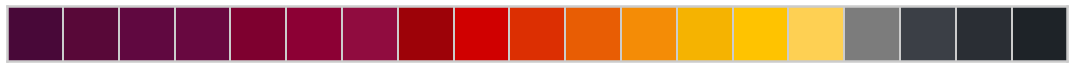

In [670]:
palette_cmap = ["#480838","#580838","#600840","#680840","#7e002f","#8c0034","#900C3F","#9D0208","#D00000","#DC2F02","#E85D04","#F48C06","#F5B301","#FFC300","#FED053","#7C7C7C","#3B3F46","#2A2E34","#1E2328"]

sns.palplot(sns.color_palette(palette_cmap))
plt.show()

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">Exploração da Correlação das Informações</h1>

In [671]:
case.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,2730.0,0.0,5.0,2.0,7.0
1,Portugal,710.0,0.0,0.0,0.0,34.0
2,Spain,4942.0,0.0,13.0,2.0,0.0
3,United States,7492.0,0.0,4.0,41.0,10.0
4,Canada,957.0,13.0,1.0,3.0,0.0


In [672]:
correlacao = (case.corr()).round(2)
correlacao

,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
Confirmed_Cases,1.00,-0.01,0.49,0.71,0.39
Suspected_Cases,-0.01,1.00,-0.04,-0.04,-0.02
Hospitalized,0.49,-0.04,1.00,0.50,0.30
Travel_History_Yes,0.71,-0.04,0.50,1.00,0.35
Travel_History_No,0.39,-0.02,0.30,0.35,1.00


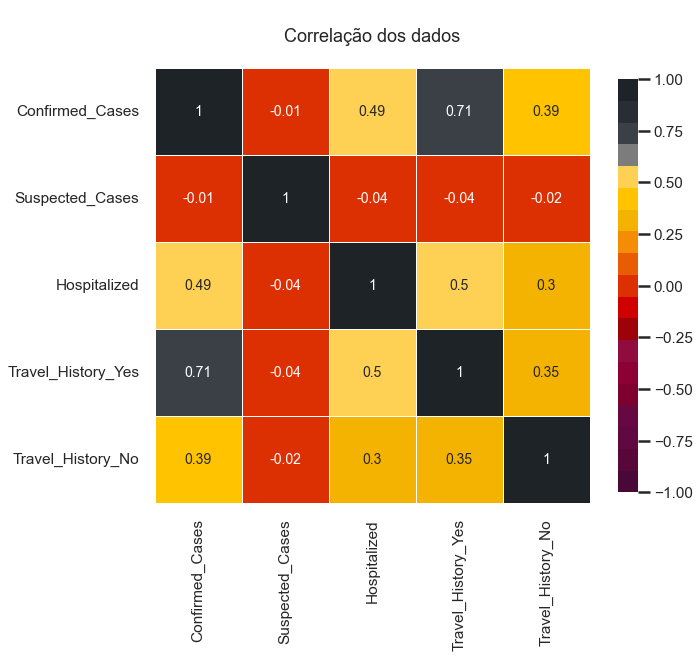

In [673]:
plt.subplots(figsize =(10, 8))

sns.heatmap(data= correlacao,
            cmap = palette_cmap, square= True, cbar_kws= dict(shrink = 0.95),
            annot= True, vmin= -1, vmax= 1, linewidths= 1, linecolor= 'white', annot_kws= dict(fontsize= 14)
            )

plt.title('\n Correlação dos dados \n', fontsize = 18)
plt.xticks(rotation=90)
plt.show()

Podemos ver que **pessoas com histórico de viagens** têm uma **correlação positiva** com os **casos confirmados** e a **internação**!!

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">Customizando Palheta de cores para visualização</h1>

In [674]:
sns.set_style("whitegrid")
sns.set_context("poster",font_scale = .7)

palheta_cores =["#071e22","#1d7874","#679289","#f4c095","#ee2e31","#ffb563",
                "#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32",
                "#ffd100","#333533","#202020"]

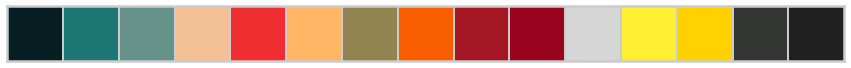

In [675]:
sns.palplot(sns.color_palette(palheta_cores))
plt.show()

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">Primeira Análise</h1>

Nessa primeira análise iremos verificar quais os países que mais tiveram casos confirmados, quais mais possuiram casos suspeitos, e o total de casos. E para uma melhor análise iremos verificar numa lista de 15 países com maiores números de casos.

In [676]:
case.columns

Index(['Country', 'Confirmed_Cases', 'Suspected_Cases', 'Hospitalized',
       'Travel_History_Yes', 'Travel_History_No'],
      dtype='object')

In [677]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             111 non-null    object 
 1   Confirmed_Cases     111 non-null    float64
 2   Suspected_Cases     111 non-null    float64
 3   Hospitalized        111 non-null    float64
 4   Travel_History_Yes  111 non-null    float64
 5   Travel_History_No   111 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.3+ KB


In [678]:
# mudando o Dtype das colunas:
# ['Confirmed_Cases', 'Suspected_Cases', 'Hospitalized', 'Travel_History_Yes', 'Travel_History_No']

case[['Confirmed_Cases', 'Suspected_Cases', 'Hospitalized', 'Travel_History_Yes', 'Travel_History_No']] =case[['Confirmed_Cases', 'Suspected_Cases', 'Hospitalized', 'Travel_History_Yes', 'Travel_History_No']].astype('int')

# criando uma Coluna Total envolvendo os casos suspeiros e os confirmados:
# total = 'Confirmed_Cases', 'Suspected_Cases'

case['Total_Case'] = case['Confirmed_Cases'] + case['Suspected_Cases']

In [679]:
case.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total_Case
0,England,2730,0,5,2,7,2730
1,Portugal,710,0,0,0,34,710
2,Spain,4942,0,13,2,0,4942
3,United States,7492,0,4,41,10,7492
4,Canada,957,13,1,3,0,970


In [680]:
# dados a serem comparados
plot1 = case.sort_values(['Confirmed_Cases'], ascending= False)
plot2 = case.sort_values(['Suspected_Cases'], ascending= False)

display(plot1.head())
display(plot2.head())

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total_Case
3,United States,7492,0,4,41,10,7492
2,Spain,4942,0,13,2,0,4942
10,Germany,2887,0,18,19,16,2887
0,England,2730,0,5,2,7,2730
7,France,2423,0,1,2,1,2423


,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total_Case
105,Democratic Republic Of The Congo,163,2103,0,0,0,2266
104,Nigeria,133,224,0,0,0,357
108,Cameroon,7,26,0,0,0,33
4,Canada,957,13,1,3,0,970
106,Central African Republic,8,9,0,0,0,17


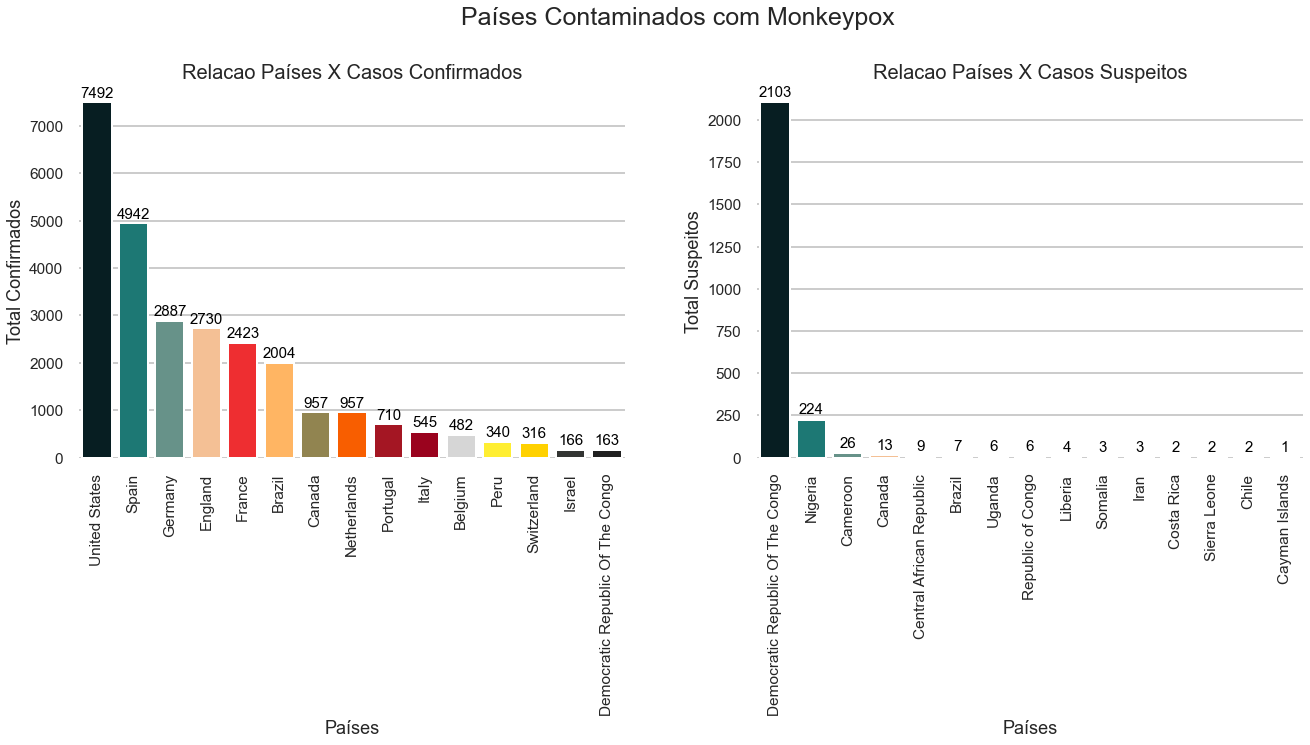

In [681]:
_, axs = plt.subplots(1,2,figsize=(20,8))
plt.tight_layout(pad=5)

# Gráfico 01 - relacao paises X casos confirmados
sns.barplot(
    x= plot1['Country'][:15],
    y= plot1['Confirmed_Cases'],
    ax = axs[0],
    palette= palheta_cores,
    saturation= 1
)
axs[0].set_title('Relacao Países X Casos Confirmados', fontsize = 20)
axs[0].set_ylabel('Total Confirmados', fontsize= 18)
axs[0].set_xlabel('Países', fontsize= 18)
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 90)

for container in axs[0].containers:
    axs[0].bar_label(container,label_type="edge",padding=2,size=15,color="black",rotation=0)


# Gráfico 02 - relacao paises X casos suspeitos
sns.barplot(
    x= plot2['Country'][:15],
    y= plot2['Suspected_Cases'],
    ax = axs[1],
    palette= palheta_cores,
    saturation= 1
)
axs[1].set_title('Relacao Países X Casos Suspeitos', fontsize = 20)
axs[1].set_ylabel('Total Suspeitos', fontsize= 18)
axs[1].set_xlabel('Países', fontsize= 18)
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation = 90)

for container in axs[1].containers:
    axs[1].bar_label(container,label_type="edge",padding=3,size=15,color="black",rotation=0)

# Realizando as demais configuracoes
plt.suptitle('Países Contaminados com Monkeypox', fontsize = 25)
sns.despine(left=True, bottom=True)
plt.show()


Com o gráfico realizado, podemos perceber que os **Estados Unidos** estão com o maior número de casos confirmados do virus, seguidos por **Espanha**, **Alemanha**, e outros. Inclusive nesse momentos podemos visualizar o **Brasil** entre os países

Enquanto isso, a **República Democrática do Congo** lidera em casos suspeitos, seguida por **Nigéria**, **Camarões** e restante.

In [682]:
plot3 = case.sort_values(['Total_Case'], ascending= False)

display(plot3.head(15))

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total_Case
3,United States,7492,0,4,41,10,7492
2,Spain,4942,0,13,2,0,4942
10,Germany,2887,0,18,19,16,2887
0,England,2730,0,5,2,7,2730
7,France,2423,0,1,2,1,2423
105,Democratic Republic Of The Congo,163,2103,0,0,0,2266
37,Brazil,2004,7,3,20,4,2011
4,Canada,957,13,1,3,0,970
11,Netherlands,957,0,0,1,0,957
1,Portugal,710,0,0,0,34,710


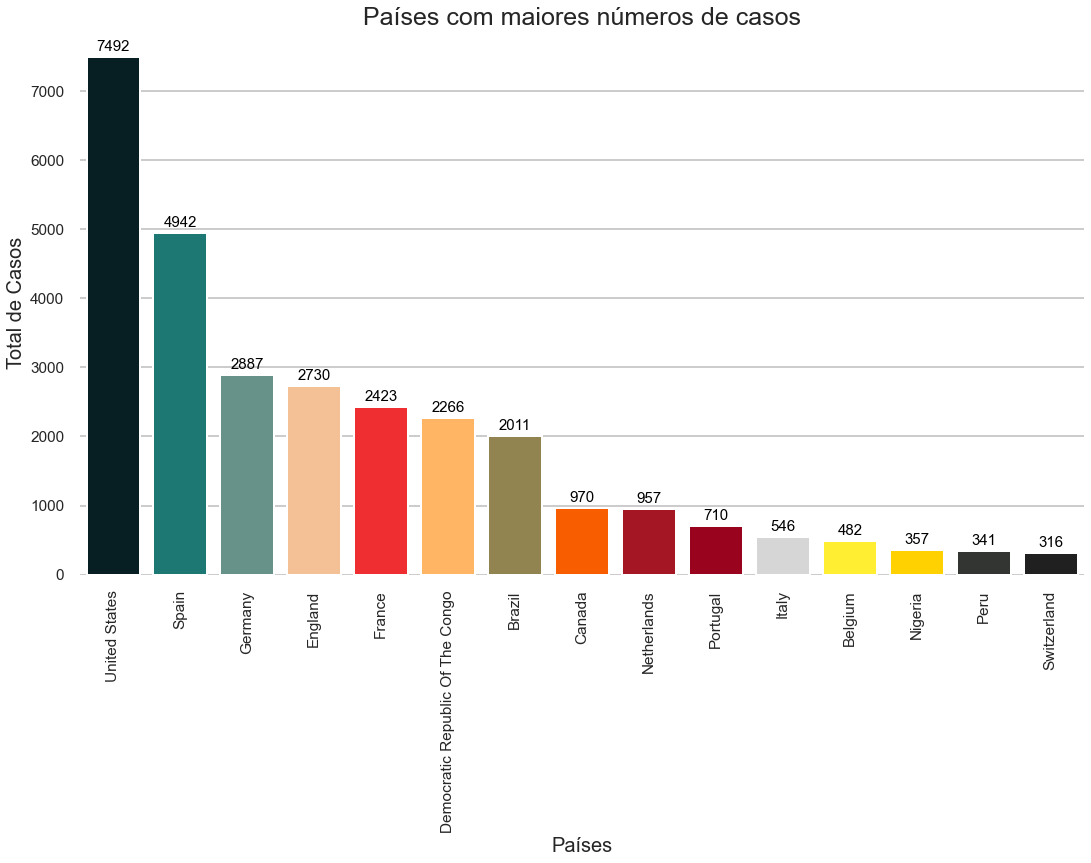

In [683]:
# Gráfico 03 - relacao paises X total de casos

## dados
ax = sns.barplot( data= plot3,
    x= plot3['Country'][:15],
    y= plot3['Total_Case'],
    palette= palheta_cores,
    saturation= 1
)

for i in ax.containers:
    ax.bar_label(i,label_type="edge", padding=3, size=15, color="k", rotation=0)

## informacoes
ax.figure.set_size_inches(18,10)
ax.set_title('Países com maiores números de casos', fontsize = 25)
ax.set_ylabel('Total de Casos', fontsize= 20)
ax.set_xlabel('Países', fontsize= 20)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

## demais configuracoes
sns.despine(left=True, bottom=True)

Mesmo que a **República Democrática do Congo** esteja com o maior número de casos suspeitos, os **Estados Unidos**, nessa análise possui o maior número de casos gerais, seguidos por **Espanha**, **Alemanha** e restante. Os 15 principais países foram escolhidos para melhor visualização.

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">Explorando dos Paciente Hospitalizados</h1>

Dentre os 15 Países com o maiores números de casos, iremos verificar o número de pessoas hospitalizados e comparar com o número de casos total.

In [684]:
case.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total_Case
0,England,2730,0,5,2,7,2730
1,Portugal,710,0,0,0,34,710
2,Spain,4942,0,13,2,0,4942
3,United States,7492,0,4,41,10,7492
4,Canada,957,13,1,3,0,970


In [685]:
case4_temp = case.sort_values(['Total_Case'], ascending= False)[:15]
display(case4_temp)

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total_Case
3,United States,7492,0,4,41,10,7492
2,Spain,4942,0,13,2,0,4942
10,Germany,2887,0,18,19,16,2887
0,England,2730,0,5,2,7,2730
7,France,2423,0,1,2,1,2423
105,Democratic Republic Of The Congo,163,2103,0,0,0,2266
37,Brazil,2004,7,3,20,4,2011
4,Canada,957,13,1,3,0,970
11,Netherlands,957,0,0,1,0,957
1,Portugal,710,0,0,0,34,710


In [686]:
case4_melt = case4_temp.melt(id_vars=['Country'], value_vars=["Total_Case","Hospitalized"],
                  var_name="Variables", value_name="Values")

display(case4_melt)

,Country,Variables,Values
0,United States,Total_Case,7492
1,Spain,Total_Case,4942
2,Germany,Total_Case,2887
3,England,Total_Case,2730
4,France,Total_Case,2423
5,Democratic Republic Of The Congo,Total_Case,2266
6,Brazil,Total_Case,2011
7,Canada,Total_Case,970
8,Netherlands,Total_Case,957
9,Portugal,Total_Case,710


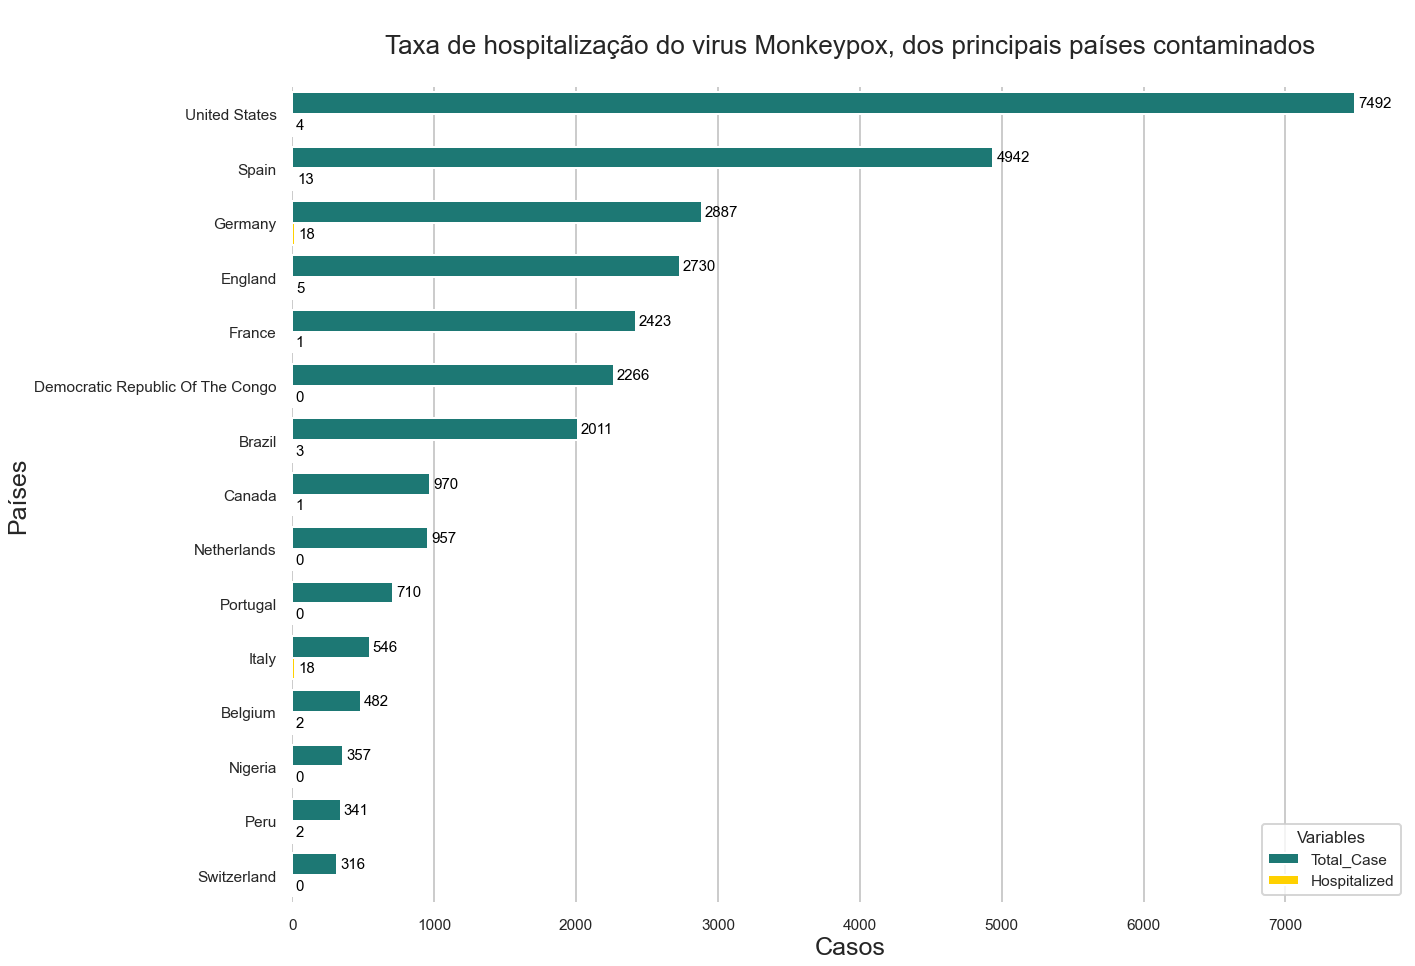

In [687]:
# dados
ax = sns.barplot(data= case4_melt,
    y= case4_melt['Country'],
    x= case4_melt['Values'],
    hue= case4_melt['Variables'],
    palette= ["#1d7874","#ffd100"],
    saturation= 1
)

for i in ax.containers:
    ax.bar_label(i,label_type="edge", padding=3, size=15, color="k", rotation=0)

# informacoes
ax.figure.set_size_inches(20,15)
ax.set_xlabel('Casos',fontsize = 25)
ax.set_ylabel('Países', fontsize = 25)
ax.set_title('\nTaxa de hospitalização do virus Monkeypox, dos principais países contaminados\n',
            fontsize = 26)

# demais configuracoes
sns.despine(left=True, bottom=True)

Com o gráfico podemos observar que os **Estados Unidos**, que possui o maior número de casos geral, não há um número relevante de casos hospitalizados, enquanto isso a **Alemanha** e a **Itália** possui o mesmo número de casos hospitalizados. Para verificarmos melhor o número de casos hospitalizados é necessario um grafico a parte

In [688]:
case4_hosp = case.sort_values(['Hospitalized'], ascending=False)
case4_hosp.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total_Case
10,Germany,2887,0,18,19,16,2887
6,Italy,545,1,18,19,4,546
2,Spain,4942,0,13,2,0,4942
70,Singapore,15,0,8,4,0,15
61,Romania,22,0,7,0,0,22


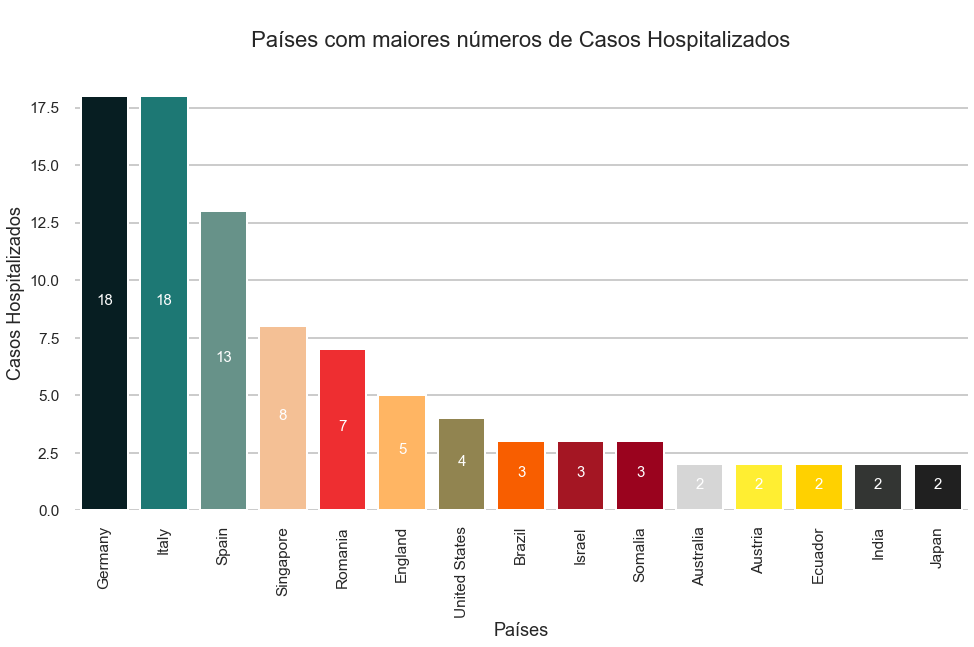

In [689]:
# dados
ax = sns.barplot(data=case4_hosp[:15],
    x= 'Country',
    y= 'Hospitalized',
    palette= palheta_cores,
    saturation= 1
    )

for i in ax.containers:
    ax.bar_label(i,label_type="center", padding=3, size=15, color="white", rotation=0)

# informacoes
ax.figure.set_size_inches(16,8)
ax.set_title('\n Países com maiores números de Casos Hospitalizados \n', fontsize = 22)
ax.set_xlabel('Países', fontsize = 18)
ax.set_ylabel('Casos Hospitalizados', fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

# demais configuracoes
sns.despine(left=True, bottom=True)

Podemos ver que o número de casos internados ainda não é alto, comparados com o número de casos e outros virus. **Itália** e **Alemanha** possuem atualmente os mesmo números de casos de hospitalização, seguidos por **Espanha**, **Cingapura**. Os 15 principais países foram escolhidos para melhor visualização.

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">Explorando o Histórico de Viagens</h1>

Segundo a Global.hearth, essa parte do estudo tem como objetivo análisarmos se o individuo realizou alguma viagem anteriormente.

> name: Travel_history (Y/N/NA)
> <br>type: Y | N | NA
> <br>description: Whether individual has travel history (Y=Yes, N=No, NA=Not applicable)




In [690]:
case.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total_Case
0,England,2730,0,5,2,7,2730
1,Portugal,710,0,0,0,34,710
2,Spain,4942,0,13,2,0,4942
3,United States,7492,0,4,41,10,7492
4,Canada,957,13,1,3,0,970


In [691]:
# criando DataFrame para pesquisas sobre viagem
case['Travel_History'] = case['Travel_History_Yes'] + case['Travel_History_No']
case5_temp = case.sort_values(['Travel_History'], ascending=False)[:15]
case5_temp.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total_Case,Travel_History
3,United States,7492,0,4,41,10,7492,51
10,Germany,2887,0,18,19,16,2887,35
1,Portugal,710,0,0,0,34,710,34
37,Brazil,2004,7,3,20,4,2011,24
6,Italy,545,1,18,19,4,546,23


In [692]:
case5_melt = case5_temp.melt(id_vars=['Country'], value_vars=["Travel_History_Yes","Travel_History_No"],
                  var_name="Variables", value_name="Values")

case5_melt

,Country,Variables,Values
0,United States,Travel_History_Yes,41
1,Germany,Travel_History_Yes,19
2,Portugal,Travel_History_Yes,0
3,Brazil,Travel_History_Yes,20
4,Italy,Travel_History_Yes,19
5,Argentina,Travel_History_Yes,11
6,England,Travel_History_Yes,2
7,Australia,Travel_History_Yes,9
8,Puerto Rico,Travel_History_Yes,6
9,Czech Republic,Travel_History_Yes,6


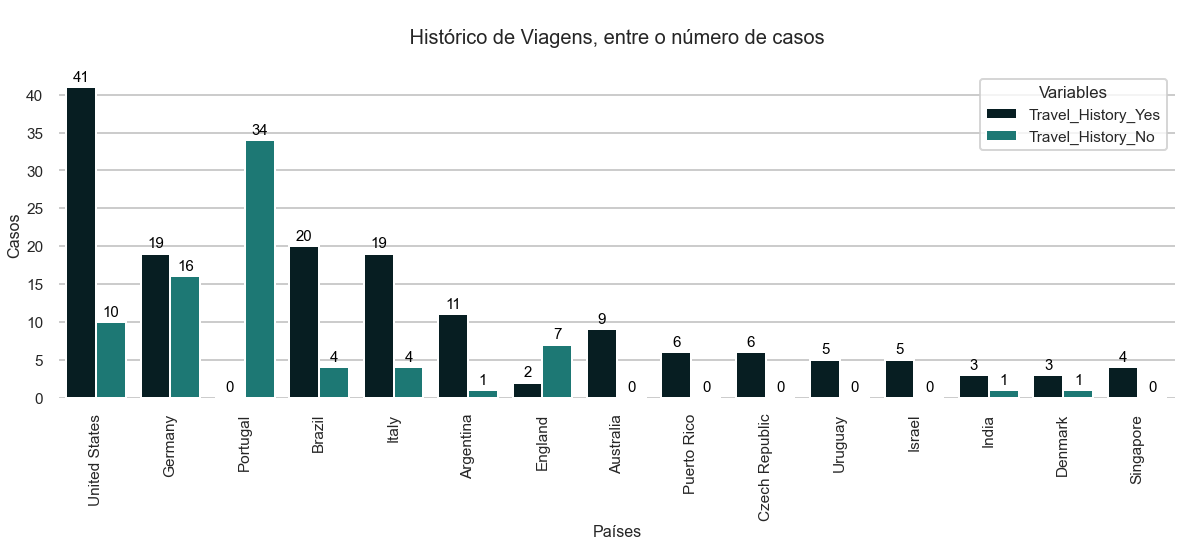

In [693]:
ax = sns.barplot(data= case5_melt,
    x= 'Country',
    y= 'Values',
    hue= 'Variables',
    palette= palheta_cores,
    saturation= 1
)

for i in ax.containers:
    ax.bar_label(i,label_type="edge", padding=3, size=15, color="black", rotation=0)

# informacoes 
ax.figure.set_size_inches(20,6)
ax.set_title('\n Histórico de Viagens, entre o número de casos \n', fontsize = 20)
ax.set_xlabel('Países', fontsize = 16)
ax.set_ylabel('Casos', fontsize = 16)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

# demais configuracoes
sns.despine(left=True, bottom=True)


Podemos ver que o histórico de viagens também é rico para **Estados Unidos**, **Alemanha**, **Brasil** e **Itália**.

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">Exploração dos Sintomas</h1>

In [694]:
case_timeline.shape

(29038, 9)

In [695]:
case_timeline['Symptoms'].unique()

array([nan, 'rash', 'vesicular rash', 'skin lesions, ulcerative lesions',
       'ulcerative lesions', 'genital ulcers',
       'perianal papules; inguinal adenopathy',
       'Slight swallowing difficulties and an elevated temperature',
       'lesions', 'genital rash', 'fever, rash',
       'fever, cough, skin lesions', 'oral and genital ulcers, fever',
       'fever, lesions', 'skin lesions', 'blisters', 'pustules, fever',
       'blisters, high fever', 'genital ulcer lesions',
       'fever, muscle pain, rash', 'Fever, skin rashes',
       'Fever, chills, fatigue, headache, skin lesions',
       'cough, chills, muscle pain, pustule-like lesions',
       'skin lesions, fever', 'fever; myalgia',
       'headache, muscle pain, back pain, vasicular rashes',
       'skin lesions, headaches, enlarged lymph nodes, fever',
       'rash on the skin', 'papules, itching',
       'Spots on skin, vesicuated lesions, skin scabs',
       'headache, fever, skin rashes', 'fever; rash',
       'feve

In [696]:
# excluindo as informacoes nao presentes
sintomas = case_timeline[['Symptoms']]
sintomas['Symptoms'].replace(np.nan, 'NA', inplace= True)
sintomas = sintomas[sintomas['Symptoms'].isin(['NA']) == False]


In [697]:
# realizando o tratamento dos dados
sintomas['Symptoms'] = sintomas["Symptoms"].str.split(", | , | ,|;")
sintomas = sintomas.explode('Symptoms')

print(f'O Número de sintomas sem tratametno é {len(sintomas.Symptoms.unique())}')

print(f'podemos visualizar eles em: ')
sintomas.Symptoms.unique()

O Número de sintomas sem tratametno é 75
podemos visualizar eles em: 


array(['rash', 'vesicular rash', 'skin lesions', 'ulcerative lesions',
       'genital ulcers', 'perianal papules', ' inguinal adenopathy',
       'Slight swallowing difficulties and an elevated temperature',
       'lesions', 'genital rash', 'fever', 'cough',
       'oral and genital ulcers', 'blisters', 'pustules', 'high fever',
       'genital ulcer lesions', 'muscle pain', 'Fever', 'skin rashes',
       'chills', 'fatigue', 'headache', 'pustule-like lesions',
       ' myalgia', 'back pain', 'vasicular rashes', 'headaches',
       'enlarged lymph nodes', 'rash on the skin', 'papules', 'itching',
       'Spots on skin', 'vesicuated lesions', 'skin scabs', ' rash',
       'swollen lymph nodes', 'Headache', 'mild fever', 'sore throat',
       'swelling of lymph nodes', 'isolated skin lesions', 'malaise',
       'Fatigue', 'skin manifestations',
       'Three lesions typical of monkeypox', 'lower abdomen skin lesions',
       'general discomfort', 'vesicles', 'rashes typical of Monkeypo

In [698]:
sintomas.query("Symptoms.str.contains('ash')").Symptoms.unique()

array(['rash', 'vesicular rash', 'genital rash', 'skin rashes',
       'vasicular rashes', 'rash on the skin', ' rash',
       'rashes typical of Monkeypox', 'rashes in the groin area', 'Rash',
       'rash and blisters', 'Rashes in the perianal region',
       'Genital rashes', 'Rash ', 'Perianal rash'], dtype=object)

In [699]:
# renomeando os sintomas para uma melhor analise
# grupos de sintomas:
# 'rash', 'Headache', 'oral and genital ulcers', 'Muscle Pain', 'wollen lymph nodes', 'skin lesions', 'Fever'

sintomas.replace(to_replace=['rash', 'vesicular rash', 'genital rash', 'skin rashes',
       'vasicular rashes', 'rash on the skin', ' rash',
       'rashes typical of Monkeypox', 'rashes in the groin area',
       'rash and blisters', 'Genital rashes', 'Perianal rash', 'Rash', 'Rashes in the perianal region', 'Rash '],
       value= 'rash', inplace= True)
sintomas.replace(to_replace=['headache', 'headaches', 'Headache'],
       value= 'headache', inplace= True)
sintomas.replace(to_replace=['muscle pain', 'muscle ache', 'back pain', 'body pains' ],
       value= 'muscle pain', inplace= True)
sintomas.replace(to_replace=['swollen lymph nodes', 'enlarged lymph nodes', 'swollen lymph nodes',
       'swelling of lymph nodes', 'Slight swallowing difficulties and an elevated temperature', 'Swelling'],
       value= 'swollen lymph nodes', inplace= True)
sintomas.replace(to_replace=['skin lesions', 'Spots on skin', 'skin scabs', 'isolated skin lesions',
       'skin manifestations', 'lower abdomen skin lesions', 'postules and scabs on the skin', 'lesions'
       'pustule-like lesions', 'Lesions' ],
       value= 'skin lesions', inplace= True)
sintomas.replace(to_replace=['fever', 'high fever', 'mild fever', 'Fever'],
       value= 'fever', inplace= True)
sintomas.replace(to_replace=[' myalgia', 'myalgia', 'myalgias'],
       value= 'myalgia', inplace= True)
sintomas.replace(to_replace=['Three lesions typical of monkeypox',
       'characteristic symptoms of Monkeypox',
       'symptoms compatible with monkeypox'],
       value= 'characteristic symptoms of Monkeypox', inplace= True)

In [700]:
sintomas.query("Symptoms.str.contains('ash')").Symptoms.unique()

array(['rash'], dtype=object)

In [701]:
len(sintomas.Symptoms.unique())

38

In [702]:
sintomas.Symptoms.unique()

array(['rash', 'skin lesions', 'ulcerative lesions', 'genital ulcers',
       'perianal papules', ' inguinal adenopathy', 'swollen lymph nodes',
       'lesions', 'fever', 'cough', 'oral and genital ulcers', 'blisters',
       'pustules', 'genital ulcer lesions', 'muscle pain', 'chills',
       'fatigue', 'headache', 'pustule-like lesions', 'myalgia',
       'papules', 'itching', 'vesicuated lesions', 'sore throat',
       'malaise', 'Fatigue', 'characteristic symptoms of Monkeypox',
       'general discomfort', 'vesicles', 'diarrhea', 'Pain urinating',
       'asthenia', 'mild symptoms', 'Vesicles', 'lymphadenopathy',
       'postules', 'encephalitis', 'blisters on limbs and genitals'],
      dtype=object)

In [703]:
print(f'Quantidade total de sintomas únicos: {len(sintomas.Symptoms.unique())}')

print(f'\n Os 15 principais sintomas únicos e respectivas ocorrências são:')
sintomas['Symptoms'].value_counts()[:15].to_frame().T

Quantidade total de sintomas únicos: 38

 Os 15 principais sintomas únicos e respectivas ocorrências são:


,fever,rash,genital ulcer lesions,skin lesions,ulcerative lesions,oral and genital ulcers,headache,fatigue,muscle pain,myalgia,swollen lymph nodes,genital ulcers,lesions,sore throat,characteristic symptoms of Monkeypox
Symptoms,56,47,30,24,21,17,12,7,6,6,6,5,4,3,3


In [704]:
sintomas_pt_br = sintomas
sintomas_pt_br.Symptoms.unique()

array(['rash', 'skin lesions', 'ulcerative lesions', 'genital ulcers',
       'perianal papules', ' inguinal adenopathy', 'swollen lymph nodes',
       'lesions', 'fever', 'cough', 'oral and genital ulcers', 'blisters',
       'pustules', 'genital ulcer lesions', 'muscle pain', 'chills',
       'fatigue', 'headache', 'pustule-like lesions', 'myalgia',
       'papules', 'itching', 'vesicuated lesions', 'sore throat',
       'malaise', 'Fatigue', 'characteristic symptoms of Monkeypox',
       'general discomfort', 'vesicles', 'diarrhea', 'Pain urinating',
       'asthenia', 'mild symptoms', 'Vesicles', 'lymphadenopathy',
       'postules', 'encephalitis', 'blisters on limbs and genitals'],
      dtype=object)

In [705]:
sintomas_pt_br.replace(to_replace=['rash', 'skin lesions', 'ulcerative lesions', 'genital ulcers',
       'perianal papules', ' inguinal adenopathy', 'swollen lymph nodes',
       'lesions', 'fever', 'cough', 'oral and genital ulcers', 'blisters',
       'pustules', 'genital ulcer lesions', 'muscle pain', 'chills',
       'fatigue', 'headache', 'pustule-like lesions', 'myalgia',
       'papules', 'itching', 'vesicuated lesions', 'sore throat',
       'malaise', 'Fatigue', 'characteristic symptoms of Monkeypox',
       'general discomfort', 'vesicles', 'diarrhea', 'Pain urinating',
       'asthenia', 'mild symptoms', 'Vesicles', 'lymphadenopathy',
       'postules', 'encephalitis', 'blisters on limbs and genitals'],
       value= ['erupção cutânea', 'lesões cutâneas', 'lesões ulcerativas', 'úlceras genitais',
        'pápulas perianais', 'adenopatia inguinal', 'linfonodos inchados',
        'lesões', 'febre', 'tosse', 'úlceras orais e genitais', 'bolhas',
        'pústulas', 'lesões de úlceras genitais', 'dor muscular', 'calafrios',
        'fadiga', 'dor de cabeça', 'lesões tipo pústula', 'mialgia',
        'pápulas', 'comichão', 'lesões vesicadas', 'dor de garganta',
        'mal-estar', 'Fadiga', 'sintomas característicos de Monkeypox',
        'desconforto geral', 'vesículas', 'diarreia', 'Dor ao urinar',
        'astenia', 'sintomas leves', 'vesículas', 'linfadenopatia',
        'postules', 'encefalite', 'bolhas nos membros e genitais'], inplace= True)

In [706]:
sintomas_pt_br.Symptoms.unique()

array(['erupção cutânea', 'lesões cutâneas', 'lesões ulcerativas',
       'úlceras genitais', 'pápulas perianais', 'adenopatia inguinal',
       'linfonodos inchados', 'lesões', 'febre', 'tosse',
       'úlceras orais e genitais', 'bolhas', 'pústulas',
       'lesões de úlceras genitais', 'dor muscular', 'calafrios',
       'fadiga', 'dor de cabeça', 'lesões tipo pústula', 'mialgia',
       'pápulas', 'comichão', 'lesões vesicadas', 'dor de garganta',
       'mal-estar', 'Fadiga', 'sintomas característicos de Monkeypox',
       'desconforto geral', 'vesículas', 'diarreia', 'Dor ao urinar',
       'astenia', 'sintomas leves', 'linfadenopatia', 'postules',
       'encefalite', 'bolhas nos membros e genitais'], dtype=object)

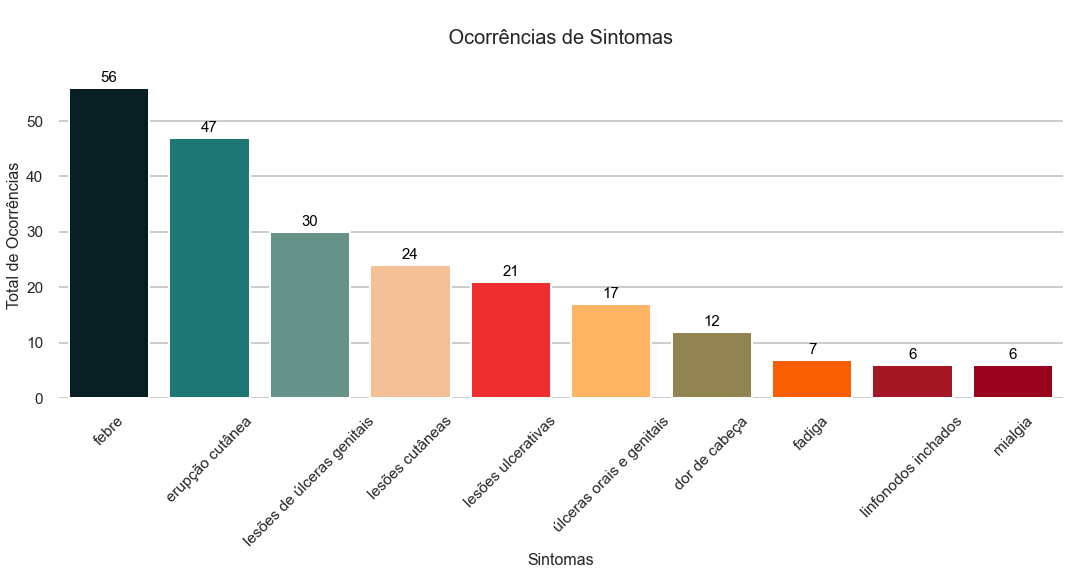

In [707]:
# dados
ax = sns.countplot(data= sintomas_pt_br,
    x= 'Symptoms',
    order= sintomas.Symptoms.value_counts().index[:10],
    palette= palheta_cores,
    saturation= 1
    )

for i in ax.containers:
    ax.bar_label(i,label_type="edge", padding=3, size=15, color="black", rotation=0)

# informacoes 
ax.figure.set_size_inches(18,6)
ax.set_title('\n Ocorrências de Sintomas \n', fontsize = 20)
ax.set_xlabel('Sintomas', fontsize = 16)
ax.set_ylabel('Total de Ocorrências', fontsize = 16)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

# demais configuracoes
sns.despine(left=True, bottom=True)

Podemos ver entre todos os sintomas **febre**, **erupção cutânea**, **lesões de úlceras genitais**, **lesões cutâneas**, **lesões ulcerativas**, **úlceras orais e genitais** são frequentemente alistado. Os 10 principais sintomas frequentes foram levados aqui para melhor visualização.

<function matplotlib.pyplot.show(close=None, block=None)>

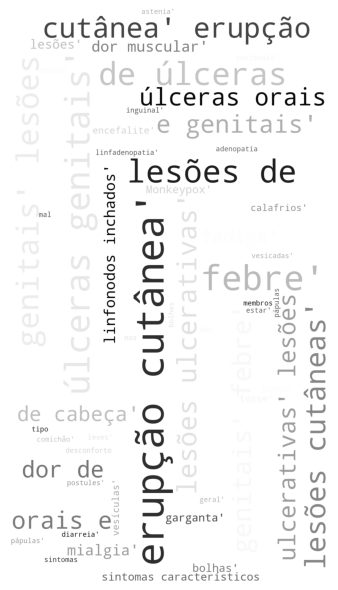

In [708]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1080, height = 1920, 
        background_color ="white",
        colormap="Greys",max_font_size=130).generate(str(sintomas_pt_br["Symptoms"].values))

# plotando o WordCloud
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0)
plt.show

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">Exploração da Linha de Tempo</h1>

In [709]:
case_timeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29038 entries, 0 to 29037
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date_confirmation        29038 non-null  object
 1   Country                  29038 non-null  object
 2   City                     994 non-null    object
 3   Age                      2440 non-null   object
 4   Gender                   1897 non-null   object
 5   Symptoms                 166 non-null    object
 6   Hospitalised (Y/N/NA)    217 non-null    object
 7   Isolated (Y/N/NA)        353 non-null    object
 8   Travel_history (Y/N/NA)  296 non-null    object
dtypes: object(9)
memory usage: 2.0+ MB


In [710]:
case_country.head()

,Country,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,...,2022-07-29,2022-07-30,2022-07-31,2022-08-01,2022-08-02,2022-08-03,2022-08-04,2022-08-05,2022-08-06,2022-08-07
0,Nigeria,3,0,1,0,6,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,Cameroon,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central African Republic,0,0,0,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Republic of Congo,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,England,0,0,0,0,0,0,0,0,1,...,0,0,0,202,0,0,92,0,0,0


In [711]:
data_incial = case_country.columns[0]
data_final = case_country.columns[-1]

print(f'O dataset começa a registrar os casos, apartir do dia {data_incial} e finaliza no dia {data_final}.')
print('Lembrando que o formado da data é YYYY-MM-DD')

O dataset começa a registrar os casos, apartir do dia Country e finaliza no dia 2022-08-07.
Lembrando que o formado da data é YYYY-MM-DD


In [712]:
datas_x_plot = ['2022-01-31', '2022-05-25', '2022-06-14', '2022-07-04', "2022-07-24", data_final]

In [713]:
case_country.set_index('Country', inplace= True)
timeline = case_country.T

In [714]:
print(f"O DataFrame 'timeline' possui um shape de {timeline.shape}\n")
print("Dando uma olhada na linha de tempo:")
display(timeline.head())

O DataFrame 'timeline' possui um shape de (95, 92)

Dando uma olhada na linha de tempo:


Country,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,Canada,...,Japan,Philippines,Uruguay,Sudan,Saint Martin (French part),Bolivia,Montenegro,Cyprus,Lithuania,Guatemala
2022-01-31,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-17,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-04,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-31,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


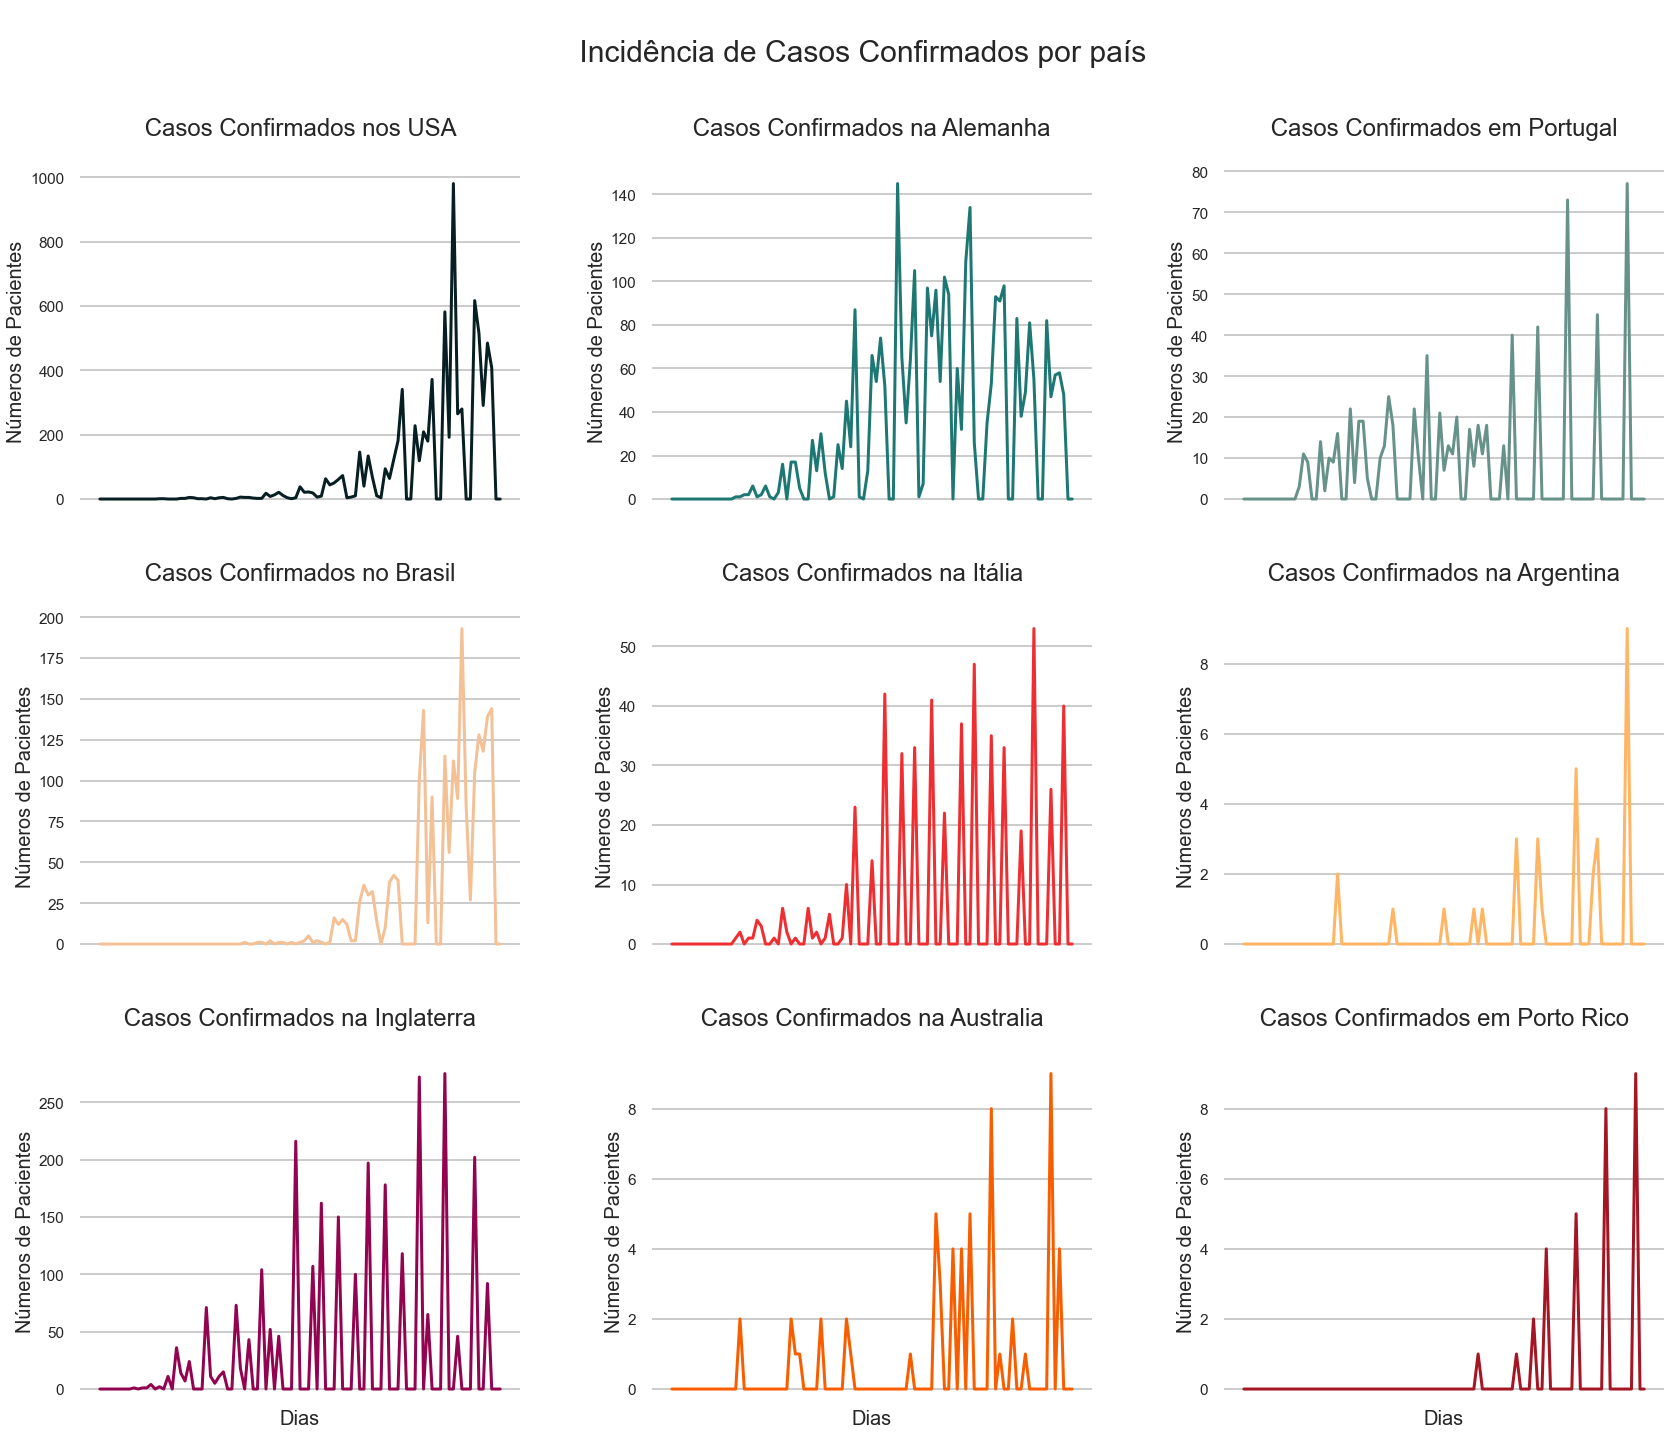

In [715]:
_, axs = plt.subplots(3,3,figsize=(25,20),sharex=True)
plt.tight_layout(pad= 5 )

# plot 1 origem = [0,0]
sns.lineplot(x = timeline.index, y = 'United States', data = timeline, color = '#071e22', ax = axs[0,0])
axs[0,0].set_title('\n Casos Confirmados nos USA \n', fontsize = 24)
axs[0,0].set_xlabel("Dias", fontsize = 20)
axs[0,0].set_ylabel("Números de Pacientes", fontsize = 20)

# plot 2 origem = [0,1]
sns.lineplot(x = timeline.index, y = 'Germany', data = timeline, color = '#1d7874', ax = axs[0,1])
axs[0,1].set_title('\n Casos Confirmados na Alemanha \n', fontsize = 24)
axs[0,1].set_xlabel("Dias", fontsize = 20)
axs[0,1].set_ylabel("Números de Pacientes", fontsize = 20)

# plot 3 origem = [0,2]
sns.lineplot(x = timeline.index, y = 'Portugal', data = timeline, color = '#679289', ax = axs[0,2])
axs[0,2].set_title('\n Casos Confirmados em Portugal \n', fontsize = 24)
axs[0,2].set_xlabel("Dias", fontsize = 20)
axs[0,2].set_ylabel("Números de Pacientes", fontsize = 20)

# plot 4 origem = [1,0]
sns.lineplot(x = timeline.index, y = 'Brazil', data = timeline, color = '#f4c095', ax = axs[1,0])
axs[1,0].set_title('\n Casos Confirmados no Brasil \n', fontsize = 24)
axs[1,0].set_xlabel("Dias", fontsize = 20)
axs[1,0].set_ylabel("Números de Pacientes", fontsize = 20)

# plot 5 origem = [1,1]
sns.lineplot(x = timeline.index, y = 'Italy', data = timeline, color = '#ee2e31', ax = axs[1,1])
axs[1,1].set_title('\n Casos Confirmados na Itália \n', fontsize = 24)
axs[1,1].set_xlabel("Dias", fontsize = 20)
axs[1,1].set_ylabel("Números de Pacientes", fontsize = 20)

# plot 6 origem = [1,2]
sns.lineplot(x = timeline.index, y = 'Argentina', data = timeline, color = '#ffb563', ax = axs[1,2])
axs[1,2].set_title('\n Casos Confirmados na Argentina \n', fontsize = 24)
axs[1,2].set_xlabel("Dias", fontsize = 20)
axs[1,2].set_ylabel("Números de Pacientes", fontsize = 20)

# plot 7 origem = [2,0]
sns.lineplot(x = timeline.index, y = 'England', data = timeline, color = '#920450', ax = axs[2,0])
axs[2,0].set_title('\n Casos Confirmados na Inglaterra \n', fontsize = 24)
axs[2,0].set_xlabel("Dias", fontsize = 20)
axs[2,0].set_ylabel("Números de Pacientes", fontsize = 20)

# plot 8 origem = [2,1]
sns.lineplot(x = timeline.index, y = 'Australia', data = timeline, color = '#f85e00', ax = axs[2,1])
axs[2,1].set_title('\n Casos Confirmados na Australia \n', fontsize = 24)
axs[2,1].set_xlabel("Dias", fontsize = 20)
axs[2,1].set_ylabel("Números de Pacientes", fontsize = 20)

# plot 9 origem = [2,2]
sns.lineplot(x = timeline.index, y = 'Puerto Rico', data = timeline, color = '#a41623', ax = axs[2,2])
axs[2,2].set_title('\n Casos Confirmados em Porto Rico \n', fontsize = 24)
axs[2,2].set_xlabel("Dias", fontsize = 20)
axs[2,2].set_ylabel("Números de Pacientes", fontsize = 20)
axs[2,2].set_xticks([],minor=False)

# demais configuracoes
plt.suptitle('\n Incidência de Casos Confirmados por país', fontsize = 30, y = 1.05)
sns.despine(left=True, bottom=True)
plt.show()


In [716]:
case5_melt.Country.unique()

array(['United States', 'Germany', 'Portugal', 'Brazil', 'Italy',
       'Argentina', 'England', 'Australia', 'Puerto Rico',
       'Czech Republic', 'Uruguay', 'Israel', 'India', 'Denmark',
       'Singapore'], dtype=object)

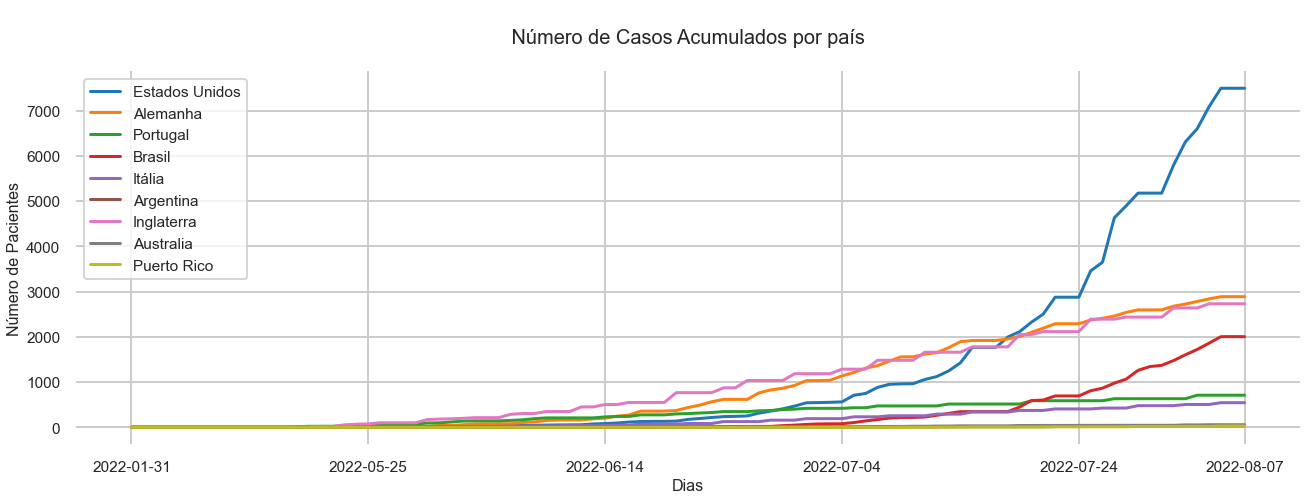

In [717]:
_, axs = plt.subplots(figsize=(20,8),sharex=True)
plt.tight_layout(pad=5)

sns.lineplot(x= timeline.index, y=timeline['United States'].cumsum(axis=0), data= timeline, ax= axs)
sns.lineplot(x= timeline.index, y=timeline['Germany'].cumsum(axis=0), data= timeline, ax= axs)
sns.lineplot(x= timeline.index, y=timeline['Portugal'].cumsum(axis=0), data= timeline, ax= axs)
sns.lineplot(x= timeline.index, y=timeline['Brazil'].cumsum(axis=0), data= timeline, ax= axs)
sns.lineplot(x= timeline.index, y=timeline['Italy'].cumsum(axis=0), data= timeline, ax= axs)
sns.lineplot(x= timeline.index, y=timeline['Argentina'].cumsum(axis=0), data= timeline, ax= axs)
sns.lineplot(x= timeline.index, y=timeline['England'].cumsum(axis=0), data= timeline, ax= axs)
sns.lineplot(x= timeline.index, y=timeline['Australia'].cumsum(axis=0), data= timeline, ax= axs)
sns.lineplot(x= timeline.index, y=timeline['Puerto Rico'].cumsum(axis=0), data= timeline, ax= axs)

# informacoes
axs.set_title('\n Número de Casos Acumulados por país \n', fontsize = 20)
axs.set_xlabel('Dias', fontsize = 16)
axs.set_ylabel('Número de Pacientes', fontsize = 16)
axs.set_xticks(datas_x_plot, fontsize = 14)
# legenda
axs.legend(["Estados Unidos","Alemanha","Portugal","Brasil","Itália","Argentina","Inglaterra","Australia","Puerto Rico"])

# demais configuracoes
sns.despine(left=True, bottom=True)
plt.show()

Podemos ver as direções dos 9 principais países contaminados com varíola dos macacos. Todos eles estão subindo gradualmente, liderando por **Estados Unidos** seguidos por **Espanha** e o restante. Podemos dizer que **dias difíceis virão** para esses países!!

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">Customizando Palheta de Cores Para Visualização dos Mapas</h1>

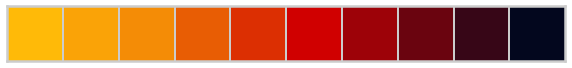

In [718]:
palette_map = ["#FFBA08","#FAA307","#F48C06","#E85D04","#DC2F02","#D00000","#9D0208","#6A040F","#370617","#03071E"]

sns.palplot(sns.color_palette(palette_map))
plt.show()

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">Explorando as origens do Monkeypox no mapa do mundo</h1>

O objetivo dessa análise é descobrirmos onde começou a origem do Virus de acordo com os países

In [719]:
case.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total_Case,Travel_History
0,England,2730,0,5,2,7,2730,9
1,Portugal,710,0,0,0,34,710,34
2,Spain,4942,0,13,2,0,4942,2
3,United States,7492,0,4,41,10,7492,51
4,Canada,957,13,1,3,0,970,3


In [720]:
fig = px.choropleth(data_frame= case,
                    locations='Country', locationmode= 'country names', color = 'Confirmed_Cases',
                    color_continuous_scale= palette_map, height= 600,
                    labels= {'Confirmed_Cases:Confirmed_Cases'})

fig.update_layout(title={"text": "Origem dos casos confirmados no Mundo",
                         "y":0.95,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})

fig.show()

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">Explorando as origens do Monkeypox na America do Norte</h1>

In [721]:
fig = px.choropleth(data_frame= case,
                    locations='Country', locationmode= 'country names', color = 'Confirmed_Cases',
                    color_continuous_scale= palette_map, height= 600, scope= "north america",
                    labels= {'Confirmed_Cases:Confirmed_Cases'})

fig.update_layout(title={"text": "Origem dos casos confirmados na America do Norte",
                         "y":0.95,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})

fig.show()

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">Explorando as origens do Monkeypox na America do Sul</h1>

In [722]:
fig = px.choropleth(data_frame= case,
                    locations='Country', locationmode= 'country names', color = 'Confirmed_Cases',
                    color_continuous_scale= palette_map, height= 600, scope= "south america",
                    labels= {'Confirmed_Cases:Confirmed_Cases'})

fig.update_layout(title={"text": "Origem dos casos confirmados na America do Sul",
                         "y":0.95,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})

fig.show()

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">Explorando as origens do Monkeypox na Africa</h1>

In [723]:
fig = px.choropleth(data_frame= case,
                    locations='Country', locationmode= 'country names', color = 'Confirmed_Cases',
                    color_continuous_scale= palette_map, height= 600, scope= "africa",
                    labels= {'Confirmed_Cases:Confirmed_Cases'})

fig.update_layout(title={"text": "Origem dos casos confirmados na Africa",
                         "y":0.95,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})

fig.show()

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">Explorando as origens do Monkeypox na Europa</h1>

In [724]:
fig = px.choropleth(data_frame= case,
                    locations='Country', locationmode= 'country names', color = 'Confirmed_Cases',
                    color_continuous_scale= palette_map, height= 600, scope= "europe",
                    labels= {'Confirmed_Cases:Confirmed_Cases'})

fig.update_layout(title={"text": "Origem dos casos confirmados na Europa",
                         "y":0.95,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})

fig.show()

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">Explorando as origens do Monkeypox na Asia</h1>

In [726]:
fig = px.choropleth(data_frame= case,
                    locations='Country', locationmode= 'country names', color = 'Confirmed_Cases',
                    color_continuous_scale= palette_map, height= 600, scope= "asia",
                    labels= {'Confirmed_Cases:Confirmed_Cases'})

fig.update_layout(title={"text": "Origem dos casos confirmados na Ásia",
                         "y":0.95,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})

fig.show()

## <h1 style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Obrigado / Thank You</h1>

### Se você gostou deste notebook, dê um upvote!.
<br>Seu feedback será muito apreciado, qualquer dúvida me chame e posso esclarecer.
<br>
<br>
**Autor :**

Ricardo Sousa Prazeres

Me acompanhe 👉 **[Email](ricardoprazeres@gmail.com), [GitHub](https://github.com/orickprazeres), [LinkedIn](https://www.linkedin.com/in/ricardo-prazeres/)**